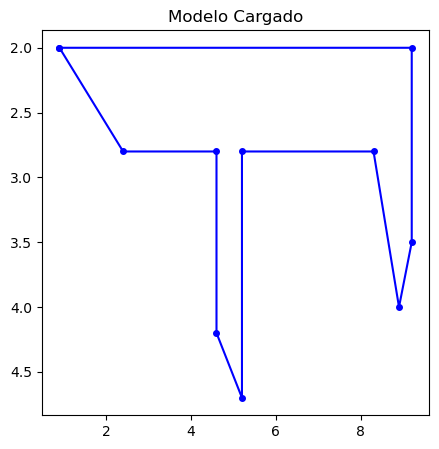

In [2]:

import tkinter as tk
from tkinter import filedialog
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class Impresora3DSimulada:
    def __init__(self, root):
        self.root = root
        self.root.title("Simulación de Impresora 3D")
        
        # Botón para cargar el archivo SVG
        self.btn_cargar = tk.Button(root, text="Cargar Modelo SVG", command=self.cargar_archivo)
        self.btn_cargar.pack()
        
        # Campos de entrada para resolución y velocidad
        self.lbl_resolucion = tk.Label(root, text="Resolución de impresión:")
        self.lbl_resolucion.pack()
        self.entry_resolucion = tk.Entry(root)
        self.entry_resolucion.pack()
        
        self.lbl_velocidad = tk.Label(root, text="Velocidad de impresión:")
        self.lbl_velocidad.pack()
        self.entry_velocidad = tk.Entry(root)
        self.entry_velocidad.pack()
        
        # Botón para iniciar la impresión
        self.btn_imprimir = tk.Button(root, text="Iniciar Impresión", command=self.iniciar_impresion)
        self.btn_imprimir.pack()
        
        # Área de visualización
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()
        
    def cargar_archivo(self):
        file_path = filedialog.askopenfilename(initialdir="models", title="Seleccionar archivo SVG",
                                               filetypes=(("Archivos SVG", "*.svg"), ("Todos los archivos", "*.*")))
        if file_path:
            self.procesar_svg(file_path)
    
    def procesar_svg(self, file_path):
        tree = ET.parse(file_path)
        root = tree.getroot()
        namespace = {"svg": "http://www.w3.org/2000/svg"}
        
        puntos = []
        for polygon in root.findall(".//svg:polygon", namespace):
            points_str = polygon.get("points")
            if points_str:
                coords = list(map(float, points_str.replace(',', ' ').split()))
                polygon_points = [(coords[i], coords[i + 1]) for i in range(0, len(coords), 2)]
                puntos.extend(polygon_points)
        
        if puntos:
            self.dibujar_modelo(puntos)
    
    def dibujar_modelo(self, puntos):
        self.ax.clear()
        x_vals, y_vals = zip(*puntos)
        self.ax.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'bo-', markersize=4)
        self.ax.invert_yaxis()
        self.ax.set_title("Modelo Cargado")
        self.canvas.draw()
    
    def iniciar_impresion(self):
        resolucion = self.entry_resolucion.get()
        velocidad = self.entry_velocidad.get()
        print(f"Iniciando impresión con resolución {resolucion} y velocidad {velocidad}")

if __name__ == "__main__":
    root = tk.Tk()
    app = Impresora3DSimulada(root)
    root.mainloop()


Impresión completada.


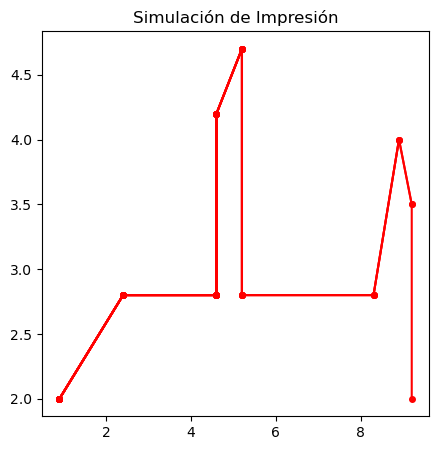

In [4]:
import tkinter as tk
from tkinter import filedialog
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

class Impresora3DSimulada:
    def __init__(self, root):
        self.root = root
        self.root.title("Simulación de Impresora 3D")
        
        # Botón para cargar el archivo SVG
        self.btn_cargar = tk.Button(root, text="Cargar Modelo SVG", command=self.cargar_archivo)
        self.btn_cargar.pack()
        
        # Campos de entrada para resolución y velocidad
        self.lbl_resolucion = tk.Label(root, text="Resolución de impresión:")
        self.lbl_resolucion.pack()
        self.entry_resolucion = tk.Entry(root)
        self.entry_resolucion.pack()
        
        self.lbl_velocidad = tk.Label(root, text="Velocidad de impresión:")
        self.lbl_velocidad.pack()
        self.entry_velocidad = tk.Entry(root)
        self.entry_velocidad.pack()
        
        # Botón para iniciar la impresión
        self.btn_imprimir = tk.Button(root, text="Iniciar Impresión", command=self.iniciar_impresion)
        self.btn_imprimir.pack()
        
        # Área de visualización
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()
        
        self.puntos = []
    
    def cargar_archivo(self):
        file_path = filedialog.askopenfilename(initialdir="models", title="Seleccionar archivo SVG",
                                               filetypes=(("Archivos SVG", "*.svg"), ("Todos los archivos", "*.*")))
        if file_path:
            self.procesar_svg(file_path)
    
    def procesar_svg(self, file_path):
        tree = ET.parse(file_path)
        root = tree.getroot()
        namespace = {"svg": "http://www.w3.org/2000/svg"}
        
        self.puntos = []
        for polygon in root.findall(".//svg:polygon", namespace):
            points_str = polygon.get("points")
            if points_str:
                coords = list(map(float, points_str.replace(',', ' ').split()))
                self.puntos = [(coords[i], coords[i + 1]) for i in range(0, len(coords), 2)]
        
        if self.puntos:
            self.dibujar_modelo()
    
    def dibujar_modelo(self):
        self.ax.clear()
        x_vals, y_vals = zip(*self.puntos)
        self.ax.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'bo-', markersize=4)
        self.ax.invert_yaxis()
        self.ax.set_title("Modelo Cargado")
        self.canvas.draw()
    
    def iniciar_impresion(self):
        resolucion = float(self.entry_resolucion.get() or 1)
        velocidad = float(self.entry_velocidad.get() or 1)
        
        if not self.puntos:
            print("No hay modelo cargado.")
            return
        
        self.ax.clear()
        
        for i in range(len(self.puntos)):
            x_vals, y_vals = zip(*self.puntos[:i+1])
            self.ax.plot(x_vals, y_vals, 'ro-', markersize=4)
            self.ax.invert_yaxis()
            self.ax.set_title("Simulación de Impresión")
            self.canvas.draw()
            time.sleep(1 / velocidad)
        
        print("Impresión completada.")

if __name__ == "__main__":
    root = tk.Tk()
    app = Impresora3DSimulada(root)
    root.mainloop()
